In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score, KFold
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.colors as mcolors
from sklearn.preprocessing import StandardScaler
import numpy as np

# Part I

## First Analysis: Maternal Health Risks

In [4]:
HRisk_data = pd.read_csv("Maternal Health Risk Data Set.csv")
HRisk_data.head(2)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk


In [5]:
HRisk_data["RiskLevel"].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [6]:
## Data pre-processing
### Removing NaN values

In [6]:
HRisk_data = HRisk_data.dropna()
HRisk_data.head(2)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk


In [8]:
#### Converting mid risk and high risk to 1 and low risk to 0

In [7]:
HRisk_data["RiskLevel"] = HRisk_data["RiskLevel"].replace({"low risk": 0, "mid risk": 1, "high risk": 1})
HRisk_data["RiskLevel"].unique()

array([1, 0])

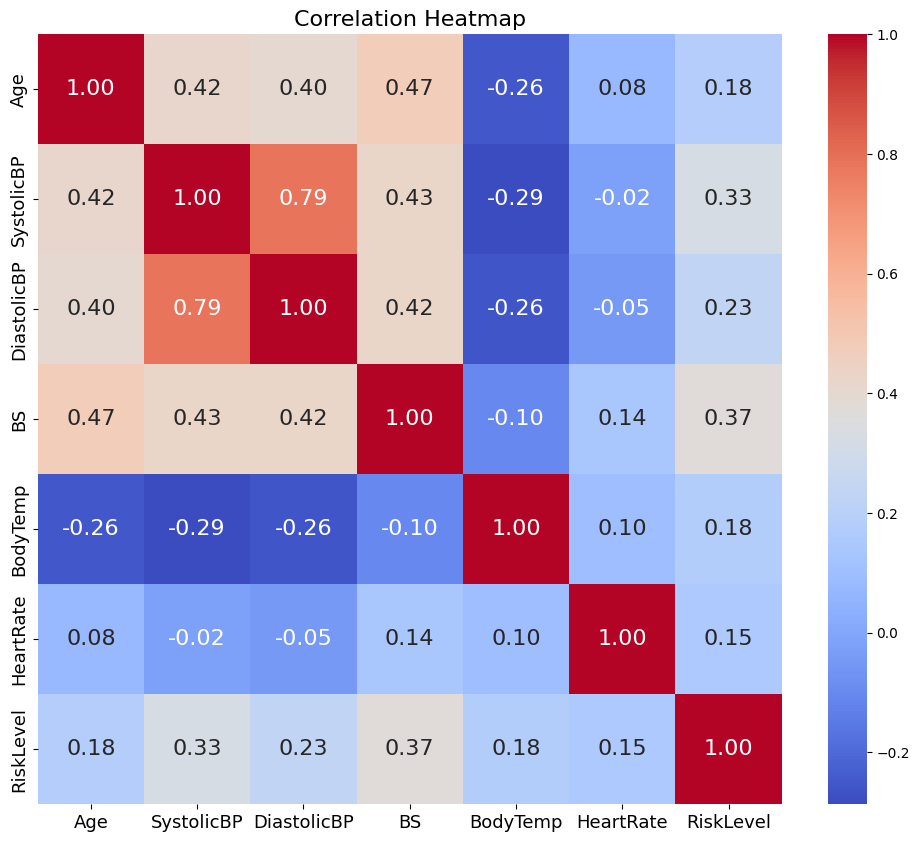

In [8]:
# plt.title("correlation heatmap")
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(HRisk_data.corr(), annot=True, cmap='coolwarm', fmt=".2f",
            annot_kws={"fontsize": 16})  # Adjust fontsize as needed
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=13)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=13)
plt.title("Correlation Heatmap", fontsize=16)  # Adjust fontsize as needed
plt.show()

Text(0.5, 1.0, 'Counts of each target names')

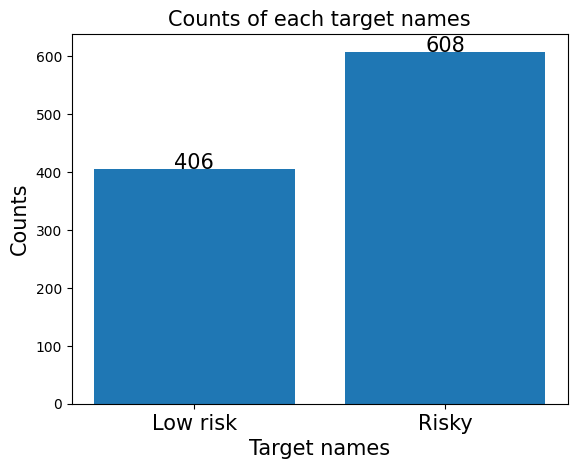

In [9]:
lowRisk_count = HRisk_data[HRisk_data["RiskLevel"] == 0].RiskLevel.count()
Risky_count = HRisk_data[HRisk_data["RiskLevel"] == 1].RiskLevel.count()

plt.bar(['Low risk', 'Risky'], [lowRisk_count, Risky_count])
plt.xticks(fontsize=15)

for i, count in enumerate([lowRisk_count, Risky_count]):
    plt.text(i, count + 0.1, str(count), ha='center', fontsize=15)

plt.xlabel("Target names", fontsize=15)
plt.ylabel("Counts", fontsize=15)
plt.title("Counts of each target names", fontsize=15)

In [10]:
data = HRisk_data[["SystolicBP", "DiastolicBP", "BS", "RiskLevel", "BodyTemp"]]
data.head(2)

,SystolicBP,DiastolicBP,BS,RiskLevel,BodyTemp
0,130,80,15.0,1,98.0
1,140,90,13.0,1,98.0


In [11]:
X = HRisk_data.drop(["RiskLevel", "HeartRate"], axis=1).values.copy()
y = HRisk_data["RiskLevel"].values.copy()


In [14]:
### Defining the decision boundaries

In [12]:
y_data = y
X_data_Sys_Dia = HRisk_data[["SystolicBP", "DiastolicBP"]]
X_data_Sys_BS = HRisk_data[["SystolicBP", "BS"]]

/home/reagb/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


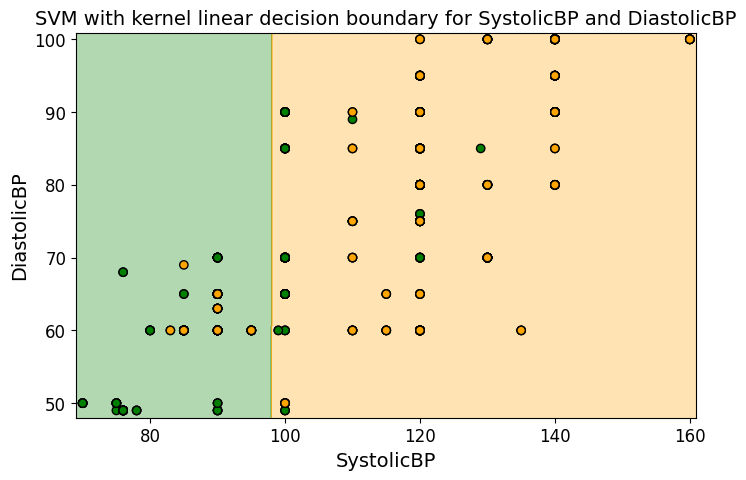

In [13]:
X = X_data_Sys_Dia  # Features
y = y_data          # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the SVM model
clf = SVC(kernel='linear')
clf.fit(X_data_Sys_Dia, y_data)

# Define meshgrid
x_min, x_max = X_data_Sys_Dia.iloc[:, 0].min() - 1, X_data_Sys_Dia.iloc[:, 0].max() + 1
y_min, y_max = X_data_Sys_Dia.iloc[:, 1].min() - 1, X_data_Sys_Dia.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict on meshgrid to get decision boundary
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
fig, ax = plt.subplots(figsize=(8, 5))

# Define custom colors for your classes
colors = ['green', 'orange']
cmap = mcolors.ListedColormap(colors)

# Update the background decision boundary to use the custom colormap
ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)

# Update the scatter plot to use the custom colormap
ax.scatter(
    X_data_Sys_Dia.iloc[:, 0],
    X_data_Sys_Dia.iloc[:, 1],
    c=y_data,
    cmap=cmap,         # Use custom colormap for orange and green bullets
    edgecolors='k'
)

# Set other plot parameters
ax.set_xlabel('SystolicBP', fontsize=14)
ax.set_ylabel('DiastolicBP', fontsize=14)
ax.set_title("SVM with kernel linear decision boundary for SystolicBP and DiastolicBP", fontsize=14)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.show()

### SVM kernel with systolic and diastolic

In [14]:
X_train_SysDias, X_test_SysDias, y_train_SysDias, y_test_SysDias = train_test_split(HRisk_data[["SystolicBP", "DiastolicBP"]], y_data, test_size=0.2, random_state=42)
clf = SVC(kernel='linear')
clf.fit(X_train_SysDias, y_train_SysDias)
predicted = clf.predict(X_test_SysDias)
p,r,f,s = precision_recall_fscore_support(y_test_SysDias, predicted, labels=[0, 1])
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

'precision = [0.625      0.67741935]'

'recall = [0.375      0.85365854]'

'f-score = [0.46875    0.75539568]'

In [18]:
# SVM linear

In [15]:
X = X_data_Sys_Dia  # Features
y = y_data          # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC(kernel="linear")
model.fit(X_train, y_train)
y_pred_LSVM = model.predict(X_test)


In [16]:
p,r,f,s = precision_recall_fscore_support(y_test, y_pred_LSVM, labels=[0, 1])

display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

'precision = [0.625      0.67741935]'

'recall = [0.375      0.85365854]'

'f-score = [0.46875    0.75539568]'

In [21]:
# SVM linear changing the class weights

In [17]:
X = X_data_Sys_Dia  # Features
y = y_data          # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC(kernel="linear", class_weight={0: .9, 1: 1})
model.fit(X_train, y_train)
y_pred_LSVM_ClassWeights = model.predict(X_test)

In [18]:
p,r,f,s = precision_recall_fscore_support(y_test, y_pred_LSVM_ClassWeights, labels=[0, 1])

display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

'precision = [0.625      0.67741935]'

'recall = [0.375      0.85365854]'

'f-score = [0.46875    0.75539568]'

In [19]:
X = X_data_Sys_Dia  # Features
y = y_data          # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC(kernel="poly")
model.fit(X_train, y_train)
y_pred_SVM_poly = model.predict(X_test)


In [20]:
p,r,f,s = precision_recall_fscore_support(y_test, y_pred_SVM_poly, labels=[0, 1])
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

'precision = [0.64788732 0.74242424]'

'recall = [0.575      0.79674797]'

'f-score = [0.60927152 0.76862745]'

In [26]:
# SVM polynomial changing class weight

In [21]:
X = X_data_Sys_Dia  # Features
y = y_data          # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC(kernel="poly", class_weight={0: .9, 1: 1})
model.fit(X_train, y_train)
y_pred_poly_classWeights = model.predict(X_test)

In [22]:
p,r,f,s = precision_recall_fscore_support(y_test, y_pred_poly_classWeights, labels=[0, 1])

display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

'precision = [0.64788732 0.74242424]'

'recall = [0.575      0.79674797]'

'f-score = [0.60927152 0.76862745]'

In [29]:
# SVM RBF

In [23]:
X = X_data_Sys_Dia  # Features
y = y_data          # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC(kernel="rbf")
model.fit(X_train, y_train)
y_pred_RBF = model.predict(X_test)

In [24]:
p,r,f,s = precision_recall_fscore_support(y_test, y_pred_RBF, labels=[0, 1])

display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

'precision = [0.65       0.63387978]'

'recall = [0.1625     0.94308943]'

'f-score = [0.26       0.75816993]'

In [32]:
# SVM RBF with changing class weights

In [25]:
X = X_data_Sys_Dia  # Features
y = y_data          # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC(kernel="rbf", class_weight={0: .9, 1: 1})
model.fit(X_train, y_train)
y_pred_RBF_ClassWeights = model.predict(X_test)

In [26]:
p,r,f,s = precision_recall_fscore_support(y_test, y_pred_RBF_ClassWeights, labels=[0, 1])

display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

'precision = [0.78571429 0.63492063]'

'recall = [0.1375     0.97560976]'

'f-score = [0.23404255 0.76923077]'

## Second analysis: Apple Quality

In [28]:
data = pd.read_csv("apple_quality.csv")
data.head(2)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.32984,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.86753,-0.722809367,good


In [29]:
data = data.dropna()
data = data.drop('A_id',axis=1)
data['Acidity'] = data['Acidity'].astype(float)
data['Quality'] = data['Quality'].replace({'good': 1, 'bad': 0})

data.head(2)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.32984,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.86753,-0.722809,1


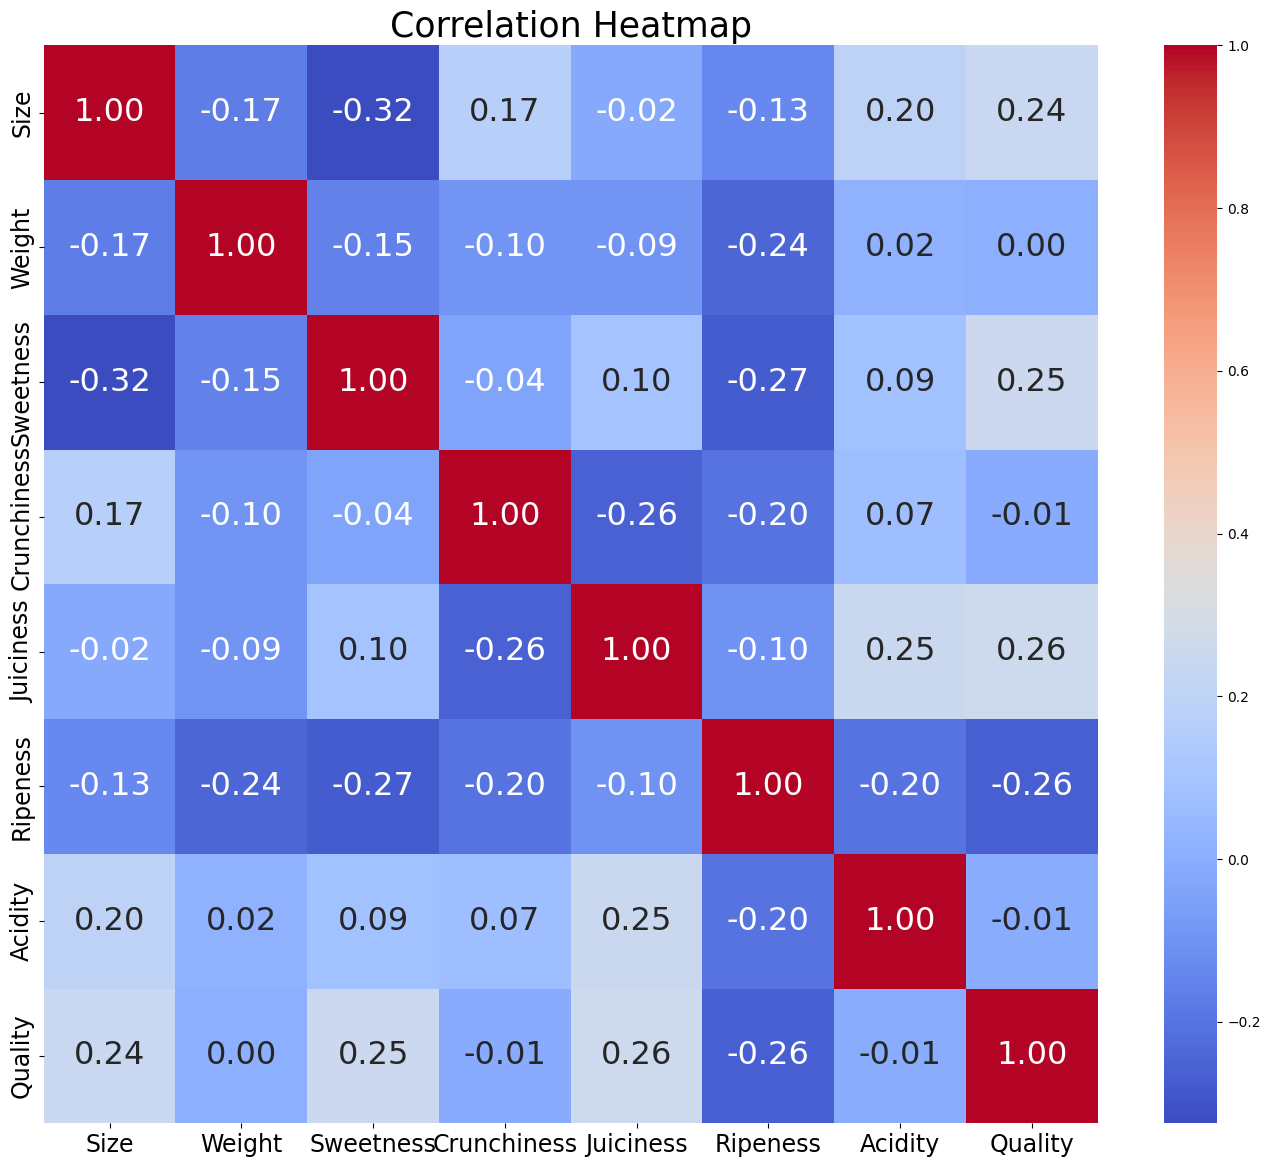

In [30]:
# plt.title("correlation heatmap")
plt.figure(figsize=(17, 14))
heatmap = sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f",
            annot_kws={"fontsize": 23})  # Adjust fontsize as needed
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=17)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=17)
plt.title("Correlation Heatmap", fontsize=25)  # Adjust fontsize as needed
plt.show()


In [31]:
df = pd.read_csv("apple_quality.csv")

In [32]:
df = df.dropna()
df = df.drop('A_id',axis=1)
df['Acidity'] = df['Acidity'].astype(float)
df['Quality'] = df['Quality'].replace({'good': 1, 'bad': 0})


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model
svm_model = SVC(kernel='linear', class_weight='balanced')
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_scaled)


Precision = [0.76202532 0.75308642]
Recall = [0.75062344 0.76441103]
F-score = [0.75628141 0.75870647]


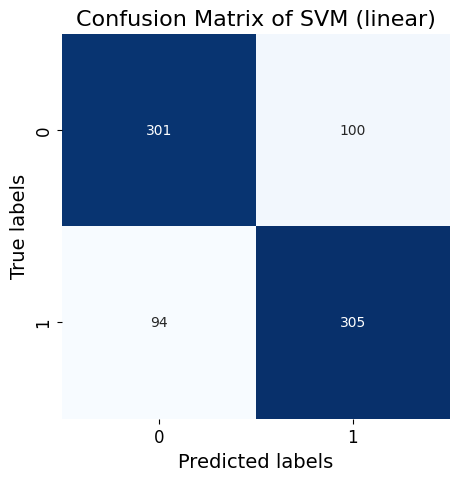

In [35]:
# Set random seed for reproducibility
np.random.seed(42)

# Assuming df is defined with features and target
# Replace "Quality" with the name of your target variable
X = df.drop("Quality", axis=1).values.copy()  # Features
y = df["Quality"].values.copy()               # Target

# Step 4: Split Data with a fixed random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train SVM Model with a linear kernel and balanced class weights
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Step 7: Make predictions
y_pred = svm_model.predict(X_test_scaled)

# Step 8: Evaluate Model - Calculate Precision, Recall, F-Score
p, r, f, s = precision_recall_fscore_support(y_test, y_pred, labels=[0, 1])

# Display Precision, Recall, and F-Score
print('Precision = {}'.format(p))
print('Recall = {}'.format(r))
print('F-score = {}'.format(f))

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Confusion Matrix of SVM (linear)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


# Part II: Possums

In [36]:
possums = pd.read_csv('possum.csv')
# Only 3 rows with nan values, just going to drop them
possums = possums.dropna()
# Make gender column, 0 is male, 1 is female
possums['gender'] = possums['sex'].replace({'m':0, 'f':1})
# Change pop column, 0 is Vic, 1 is other
possums['Pop'] = possums['Pop'].replace({'Vic':0, 'other':1})

possums

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,gender
0,1,1,0,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,0
1,2,1,0,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,1
2,3,1,0,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,1
3,4,1,0,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,1
4,5,1,0,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,1,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0,0
100,101,7,1,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0,0
101,102,7,1,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0,1
102,103,7,1,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0,0


Which possum body dimensions are most correlated with age and sex?

<Axes: >

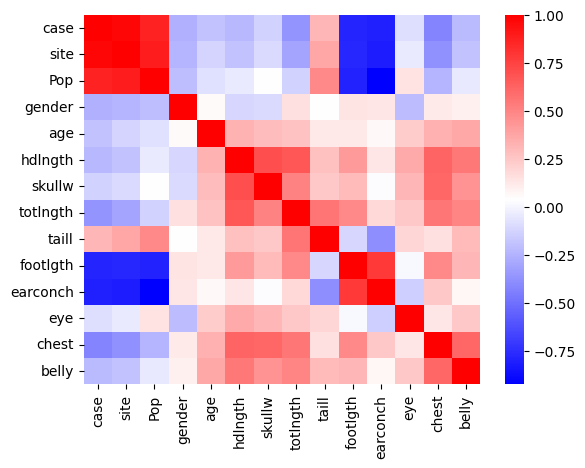

In [37]:
sns.heatmap(possums[['case','site','Pop','gender', 'age','hdlngth','skullw','totlngth',	'taill','footlgth',	'earconch','eye','chest','belly']].corr(), cmap='bwr')

Try predicting gender based on site and eye

'predicted range: [0.00,1.00]'

'precision = [0.73333333 0.5       ]'

'recall = [0.78571429 0.42857143]'

'f-score = [0.75862069 0.46153846]'

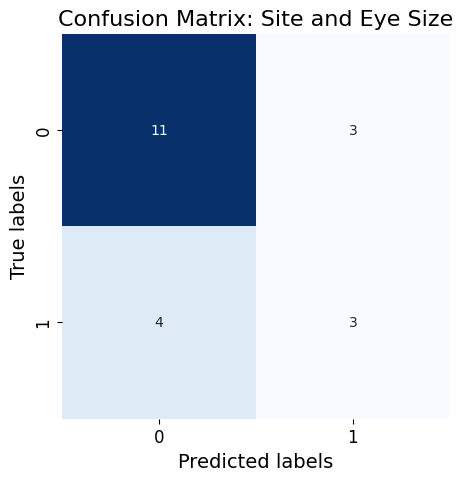

In [38]:
X = possums[['site','eye']]
y = possums.gender

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=90)

lm = LogisticRegression()
lm.fit(X_train, y_train)

# print(lm.intercept_)
# print(lm.coef_)

y_pred = lm.predict(X_test)

# 0 is Male, 1 is Female
display('predicted range: [{0:.2f},{1:.2f}]'.format(min(y_pred), max(y_pred)))

p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Confusion Matrix: Site and Eye Size', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Can we classify a possum's sex by its body dimensions and location?

/home/reagb/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


'predicted range: [0.00,1.00]'

'precision = [0.69230769 0.375     ]'

'recall = [0.64285714 0.42857143]'

'f-score = [0.66666667 0.4       ]'

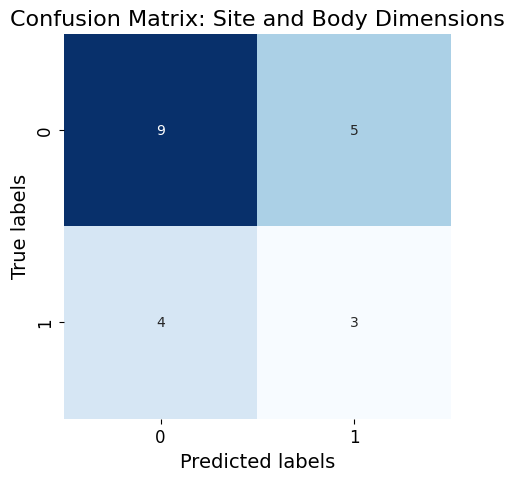

In [39]:
X = possums[['site', 'hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']]
y = possums.gender

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=90)

lm = LogisticRegression()
lm.fit(X_train, y_train)

# print(lm.intercept_)
# print(lm.coef_)

y_pred = lm.predict(X_test)

# 0 is Male, 1 is Female
display('predicted range: [{0:.2f},{1:.2f}]'.format(min(y_pred), max(y_pred)))

p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Confusion Matrix: Site and Body Dimensions', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Can we classify a possum's population by its foot and tail length?

'predicted range: [0.00,1.00]'

'precision = [0.90909091 0.9       ]'

'recall = [0.90909091 0.9       ]'

'f-score = [0.90909091 0.9       ]'

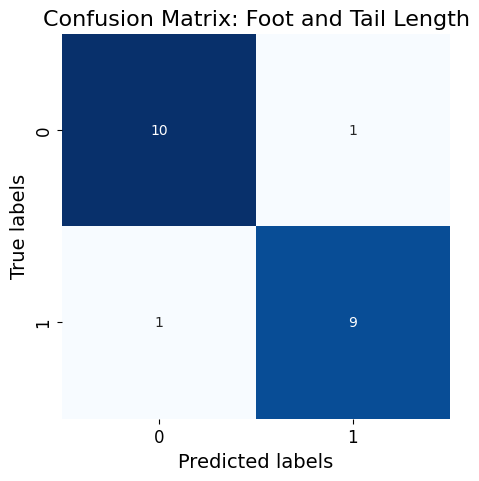

In [40]:
X = possums[['footlgth', 'taill']]
y = possums.Pop

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

lm = LogisticRegression()
lm.fit(X_train, y_train)

# print(lm.intercept_)
# print(lm.coef_)

y_pred = lm.predict(X_test)

# 0 is Male, 1 is Female
display('predicted range: [{0:.2f},{1:.2f}]'.format(min(y_pred), max(y_pred)))

p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Confusion Matrix: Foot and Tail Length', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Graphing the regression line between Pop and taill

Text(0, 0.5, 'Foot Length')

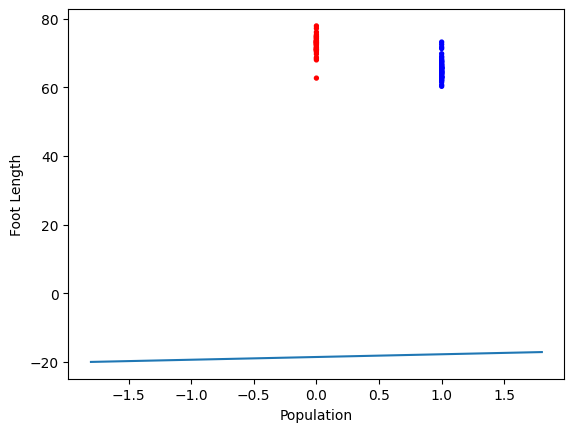

In [42]:
color = ['r' if y_ == 0 else 'b' for y_ in y]
plt.scatter(possums.Pop, possums.footlgth, c=color, s=8)

b0 = lm.intercept_[0]
b = lm.coef_[0]

Xdb = [-1.8, 1.8]
ydb = [-(b0+b[0]*x)/b[1] for x in Xdb]
plt.plot(Xdb, ydb)
plt.xlabel('Population')
plt.ylabel('Foot Length')

(-1.0, 7000.0)

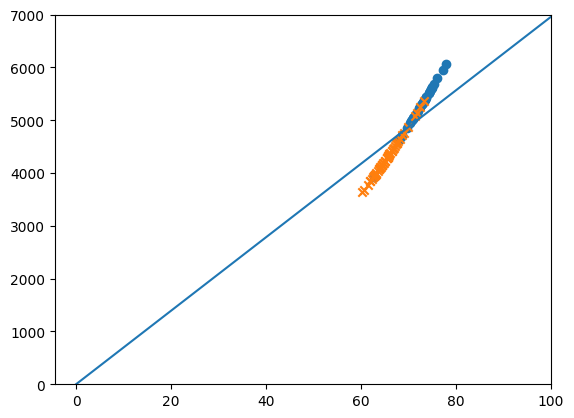

In [43]:
X = possums.footlgth.to_list()
X = [[x, x**2] for x in X]

# We can get a nice decision boundary for this dataset...
y = possums.Pop.to_list()

Xy = list(zip(X, y))
zeros = [xy for xy in Xy if xy[1] == 0]
(Xzeros, yzeros) = list(zip(*zeros))
ones = [xy for xy in Xy if xy[1] == 1]
(Xones, yones) = list(zip(*ones))
(xzeros_p, yzeros_p) = zip(*Xzeros)
(xones_p, yones_p) = zip(*Xones)
plt.scatter(xzeros_p, yzeros_p, marker='o')
plt.scatter(xones_p, yones_p, marker='x')

lm = LogisticRegression()
lm.fit(X, y)

b0 = lm.intercept_[0]
b = lm.coef_[0]

# Draw the decision boundary
Xdb = [-4, 100]
ydb = [-(b0+b[0]*x)/b[1] for x in Xdb]
plt.plot(Xdb, ydb)
plt.xlim([-4.5, 100])
plt.ylim([-1, 7000])

Graphing boundary for tail and foot length

<class 'list'>


(49.0, 90.0)

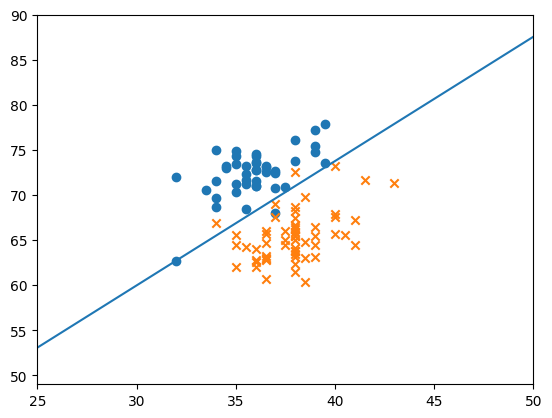

In [44]:
X = possums.taill.to_list()
x = possums.footlgth.to_list()
X = list(zip(X,x))
print(type(X))

y = possums.Pop.to_list()

Xy = list(zip(X, y))
zeros = [xy for xy in Xy if xy[1] == 0]
(Xzeros, yzeros) = list(zip(*zeros))
ones = [xy for xy in Xy if xy[1] == 1]
(Xones, yones) = list(zip(*ones))

(xzeros_p, yzeros_p) = zip(*Xzeros)
(xones_p, yones_p) = zip(*Xones)
plt.scatter(xzeros_p, yzeros_p, marker='o')
plt.scatter(xones_p, yones_p, marker='x')

# Xs = possums[['footlgth', 'taill']]
# ys = possums.Pop
lm = LogisticRegression()
lm.fit(X, y)

b0 = lm.intercept_[0]
b = lm.coef_[0]

# Draw the decision boundary
Xdb = [-4, 50]
ydb = [-(b0+b[0]*x)/b[1] for x in Xdb]
# plt.title("Population Kernel Trick")
plt.plot(Xdb, ydb)
plt.xlim([25, 50])
plt.ylim([49, 90])